In [9]:
# Dependencies
import json
import requests
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime
from scipy.stats import linregress


# Import the API key
from config import weather_key

# Abililty to utilize citipy to determine nearest cities using geo coordinates (longitude and Latitude)
from citipy import citipy


# Capture output
cities_output_data = 'output/cities_output.csv'


# Define the range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate the list of Cities

In [10]:
# Create lists to hold the geo coordinates and the cities
lat_lngs = []
cities = []


# Create random latitude and longitude sets
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size = 1500)
lat_lngs = zip(lats, lngs)

# What are the nearest cities for each latitude and longitude set
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
# add the city to the cities list if it is unique
    if city not in cities:
        cities.append(city)
                
# Do I have enough cities?
print(len(cities))

596


# Perform API calls to OpenWeatherMap and create a DataFrame

In [11]:
# Define the url the make the API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#Variables to keep track of response number
record = 0
sets = 1

In [17]:
# Create a DataFrame that will hold the results of the API calls to OpenWeatherMap
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


#Execute API calls to OpenWeatherMap for each city in the dataset
print('Data Retrieval start')
print("--------------------")

for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
         
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Data Retrieval start
--------------------
Processing Record 46  of Set 12 | mar del plata.
Processing Record 47  of Set 12 | kapaa.
Processing Record 48  of Set 12 | tasiilaq.
Processing Record 49  of Set 12 | taltal.
Processing Record 0  of Set 13 | port alfred.
Processing Record 1  of Set 13 | hermanus.
Processing Record 2  of Set 13 | ternate.
Processing Record 3  of Set 13 | hovd.
Processing Record 4  of Set 13 | rikitea.
Processing Record 5  of Set 13 | dingle.
Processing Record 6  of Set 13 | roald.
Processing Record 7  of Set 13 | nara.
Processing Record 8  of Set 13 | hobart.
Processing Record 9  of Set 13 | longyearbyen.
Processing Record 10  of Set 13 | provideniya.
Processing Record 11  of Set 13 | barentsburg.
City not found...skipping barentsburg.
Processing Record 12  of Set 13 | tias.
Processing Record 13  of Set 13 | nanortalik.
Processing Record 14  of Set 13 | bluff.
Processing Record 15  of Set 13 | east london.
Processing Record 16  of Set 13 | rio branco.
Processin

Processing Record 25  of Set 16 | isangel.
Processing Record 26  of Set 16 | benjamin constant.
Processing Record 27  of Set 16 | norman wells.
Processing Record 28  of Set 16 | pangnirtung.
Processing Record 29  of Set 16 | blora.
Processing Record 30  of Set 16 | asau.
Processing Record 31  of Set 16 | portree.
Processing Record 32  of Set 16 | pacific grove.
Processing Record 33  of Set 16 | mpika.
Processing Record 34  of Set 16 | requena.
Processing Record 35  of Set 16 | aksarka.
Processing Record 36  of Set 16 | sheopur.
Processing Record 37  of Set 16 | kieta.
Processing Record 38  of Set 16 | deputatskiy.
Processing Record 39  of Set 16 | twentynine palms.
Processing Record 40  of Set 16 | ballina.
Processing Record 41  of Set 16 | chernyshevskiy.
Processing Record 42  of Set 16 | rumuruti.
Processing Record 43  of Set 16 | basavana bagevadi.
Processing Record 44  of Set 16 | termiz.
Processing Record 45  of Set 16 | malatya.
Processing Record 46  of Set 16 | buckeye.
Processi

Processing Record 45  of Set 19 | gwanda.
Processing Record 46  of Set 19 | marsa matruh.
Processing Record 47  of Set 19 | minsk mazowiecki.
Processing Record 48  of Set 19 | saint-georges.
Processing Record 49  of Set 19 | anchorage.
Processing Record 0  of Set 20 | labuan.
Processing Record 1  of Set 20 | guerrero negro.
Processing Record 2  of Set 20 | sokoni.
Processing Record 3  of Set 20 | puerto rondon.
Processing Record 4  of Set 20 | fukue.
Processing Record 5  of Set 20 | itzehoe.
Processing Record 6  of Set 20 | santa fe.
Processing Record 7  of Set 20 | edmundston.
Processing Record 8  of Set 20 | port blair.
Processing Record 9  of Set 20 | mayya.
Processing Record 10  of Set 20 | moctezuma.
Processing Record 11  of Set 20 | tunduru.
City not found...skipping tunduru.
Processing Record 12  of Set 20 | teguldet.
Processing Record 13  of Set 20 | tselinnoye.
Processing Record 14  of Set 20 | tiznit.
Processing Record 15  of Set 20 | kamenka.
Processing Record 16  of Set 20 

Processing Record 24  of Set 23 | lianzhou.
Processing Record 25  of Set 23 | nueve de julio.
Processing Record 26  of Set 23 | yinchuan.
Processing Record 27  of Set 23 | tonota.
Processing Record 28  of Set 23 | ucluelet.
Processing Record 29  of Set 23 | lakatoro.
Processing Record 30  of Set 23 | bonthe.
Processing Record 31  of Set 23 | qaqortoq.
Processing Record 32  of Set 23 | lavrentiya.
Processing Record 33  of Set 23 | varnavino.
Processing Record 34  of Set 23 | mitsamiouli.
Processing Record 35  of Set 23 | dudinka.
Processing Record 36  of Set 23 | sobolevo.
Processing Record 37  of Set 23 | texarkana.
Processing Record 38  of Set 23 | guarapari.
Processing Record 39  of Set 23 | asmara.
Processing Record 40  of Set 23 | bloomfield.
Processing Record 41  of Set 23 | kigoma.
Processing Record 42  of Set 23 | jaguaruana.
Processing Record 43  of Set 23 | la ronge.
Processing Record 44  of Set 23 | tura.
Processing Record 45  of Set 23 | atherton.
Processing Record 46  of Se

In [18]:
# How many cities were returned?
weather_df.count()

City                596
Country             596
Date                596
Latitude            596
Longitude           596
Cloudiness (%)      596
Humidity (%)        596
Max Temp (F)        596
Wind Speed (mph)    596
dtype: int64

In [19]:
# Display the Weather DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,mar del plata,AR,2021-01-24 07:41:36,-38.0023,-57.5575,40,100,85.262,4.12
1,kapaa,US,2021-01-24 07:41:36,22.0752,-159.319,90,88,74.264,7.2
2,tasiilaq,GL,2021-01-24 07:41:36,65.6145,-37.6368,0,48,14.27,0.51
3,taltal,CL,2021-01-24 07:41:36,-25.4,-70.4833,0,59,71.222,2.92
4,port alfred,ZA,2021-01-24 07:41:36,-33.5906,26.891,98,96,67.262,1.34


In [28]:
#Export the weather dataframe to an output file
weather_df.to_csv("output/weather_df.csv")

#    Generate data plots

# Temperature vs. Latitude 

Temperatures are lower the further away from the equator you are.


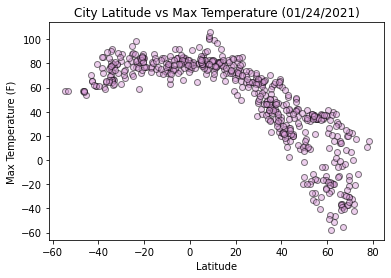

In [50]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="plum", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.savefig("output/LatTmp.png")
print("Temperatures are lower the further away from the equator you are.")

# Humidity vs. Latitude

There is wide distribution of humidity and latitude, and no clear relatioship is seen


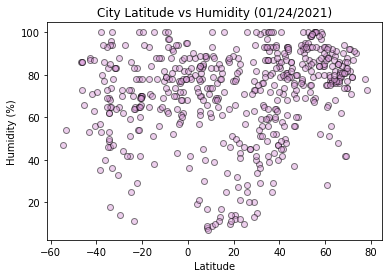

In [51]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="plum", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({today})")
plt.savefig("output/LatHum.png")
print("There is wide distribution of humidity and latitude, and no clear relatioship is seen")

# Cloudiness vs. Latitude

There is wide distribution of cloudiness and latitude, and no clear relatioship is seen


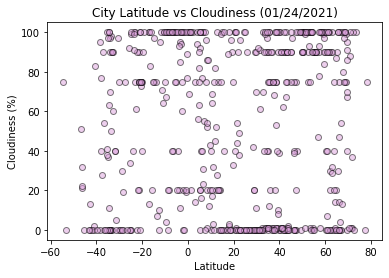

In [52]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="plum", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
plt.savefig("output/LatCloud.png")
print("There is wide distribution of cloudiness and latitude, and no clear relatioship is seen")

# Wind Speed vs Latitude

There is wide distribution of wind speed and latitude, and no clear relatioship is seen


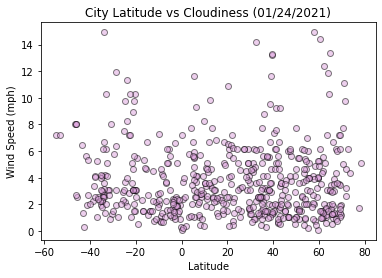

In [53]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="plum", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Cloudiness ({today})")
plt.savefig("output/LatWind.png")
print("There is wide distribution of wind speed and latitude, and no clear relatioship is seen")